## Work
1. 請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現

In [12]:
import os
import keras

from keras.models import Sequential
from keras.layers import Dense

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若想使用可自行開啟)
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [3]:
train, test = keras.datasets.cifar10.load_data()

In [4]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [5]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [9]:
def build_mlp(input,output):
    """Code Here
    建立你的神經網路
    """
    model = Sequential()
    model.add(Dense(256,input_dim = input, activation='relu'))
    model.add(Dense(128,activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(output, activation='softmax'))
    return model

In [10]:
"""Code Here
設定超參數
"""
LR =[1e-4, 1e-3, 5e-3, 1e-2,5e-2,1e-1,5e-1]
epochs = 10
batch_size =256

In [14]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
from keras.optimizers import Adam
results = {}
for lr in LR:
    model = build_mlp(x_train.shape[1], y_train.shape[1])
    model.summary()
    model.compile(loss="categorical_crossentropy", optimizer=Adam(lr=lr), metrics=["accuracy"])
    model.fit(x_train, y_train, 
              epochs=epochs, 
              batch_size=batch_size, 
              validation_split=0.2, 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    
    results[lr] = {'train-loss': train_loss,'valid-loss': valid_loss, 'train-acc': train_acc, 'valid-acc': valid_acc}


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 256)               786688    
_________________________________________________________________
dense_6 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_7 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_8 (Dense)              (None, 10)                650       
Total params: 828,490
Trainable params: 828,490
Non-trainable params: 0
_________________________________________________________________
Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 2s 39us/step - loss: 2.0003 - accuracy: 0.2801 - val_loss: 1.8702 - val_accuracy: 0.3367
Epoch 2/10
40000/40000 [=========================

40000/40000 [==============================] - 2s 38us/step - loss: 2.7628 - accuracy: 0.1700 - val_loss: 2.0277 - val_accuracy: 0.2360
Epoch 2/10
40000/40000 [==============================] - 1s 36us/step - loss: 1.9501 - accuracy: 0.2848 - val_loss: 1.9249 - val_accuracy: 0.3026
Epoch 3/10
40000/40000 [==============================] - 1s 36us/step - loss: 1.8412 - accuracy: 0.3322 - val_loss: 1.8720 - val_accuracy: 0.3164
Epoch 4/10
40000/40000 [==============================] - 1s 35us/step - loss: 1.7795 - accuracy: 0.3565 - val_loss: 1.7834 - val_accuracy: 0.3556
Epoch 5/10
40000/40000 [==============================] - 1s 36us/step - loss: 1.7333 - accuracy: 0.3730 - val_loss: 1.7348 - val_accuracy: 0.3745
Epoch 6/10
40000/40000 [==============================] - 1s 36us/step - loss: 1.6961 - accuracy: 0.3884 - val_loss: 1.7842 - val_accuracy: 0.3646
Epoch 7/10
40000/40000 [==============================] - 1s 36us/step - loss: 1.7006 - accuracy: 0.3858 - val_loss: 1.8294 - val

40000/40000 [==============================] - 1s 35us/step - loss: 2.3186 - accuracy: 0.1000 - val_loss: 2.9001 - val_accuracy: 0.1025
Epoch 8/10
40000/40000 [==============================] - 1s 35us/step - loss: 2.3173 - accuracy: 0.1014 - val_loss: 2.8980 - val_accuracy: 0.1003
Epoch 9/10
40000/40000 [==============================] - 1s 35us/step - loss: 2.3170 - accuracy: 0.0986 - val_loss: 2.8980 - val_accuracy: 0.1022
Epoch 10/10
40000/40000 [==============================] - 1s 36us/step - loss: 2.3168 - accuracy: 0.1014 - val_loss: 2.9024 - val_accuracy: 0.1025


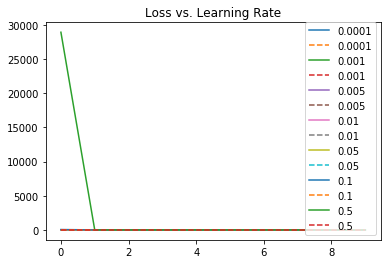

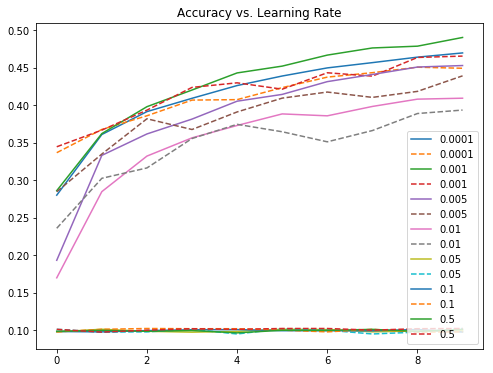

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""

import matplotlib.pyplot as plt
%matplotlib inline 
    
#NUM_COLORS = len(results.keys())
#cm = plt.get_cmap('gist_rainbow')
#color_bar = [cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)]

#plt.figure(figsize=(8,6))
for i, j in enumerate(results.keys()):
    plt.plot(range(len(results[j]['train-loss'])),results[j]['train-loss'], '-', label=j)
    plt.plot(range(len(results[j]['valid-loss'])),results[j]['valid-loss'], '--', label=j)
plt.title("Loss vs. Learning Rate")
plt.legend(loc=4)
plt.show()

plt.figure(figsize=(8,6))
for i, j in enumerate(results.keys()):
    plt.plot(range(len(results[j]['train-acc'])),results[j]['train-acc'], '-', label=j)
    plt.plot(range(len(results[j]['valid-acc'])),results[j]['valid-acc'], '--', label=j)
plt.title("Accuracy vs. Learning Rate")
plt.legend(loc=4)
plt.show()